# Stoneburner, Kurt
- ## DSC 650 - Week 06
- ## Assignment 6.2 - ConvNet Model that classifies images in the CIFAR digital dataset.

Reference:
https://keras.io/api/applications/#classify-imagenet-classes-with-resnet50



Max-Pooling Explained: 
https://analyticsindiamag.com/max-pooling-in-convolutional-neural-network-and-its-features/

Conv2D Official Documentation:
https://keras.io/api/layers/convolution_layers/convolution2d/

In [2]:
"""
#//*** Enable Plaid-Ml GPU backend for Radeon Cards. (it works faster on some things)
from os import environ

environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import tensorflow.keras
"""
print()

In [4]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [5]:
#//********************************************************
#//*** Plot a Fitted Models History of Loss and Accuracy
#//********************************************************
def plot_model_history(input_history,loss='loss',acc='accuracy'):
    print(input_history.history.keys())
    loss = input_history.history[list(input_history.history.keys())[0]]
    acc = input_history.history[list(input_history.history.keys())[1]]
    
    
    
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, "b", label="Training Accuracy")
    plt.title("Training Accuracy\nAccuracy should go up")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    

    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training Loss")
    
    plt.title("Training Loss \nLoss should go down")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
#//****************************************************************
#//*** Plot a Fitted Models History Training and Validation Loss
#//****************************************************************
def plot_model_validation(input_history):
    
    #//*** Assign Loss/Accuracy/Validation Loss/Validation Accuracy
    #//*** Based on Dictionary Key Tuple position
    
    loss = input_history.history[list(input_history.history.keys())[0]]
    acc = input_history.history[list(input_history.history.keys())[1]]
    val_loss = input_history.history[list(input_history.history.keys())[2]]
    val_acc = input_history.history[list(input_history.history.keys())[3]]
    #print(loss,acc,val_loss,val_acc)
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    #//*** Plot the Validation Set Accuracy
    plt.clf()
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()    


## Assignment 6.2a ##

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part.

Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.


In [9]:
def create_model():
    
    #//*** Using relu (Rectified Linear Units) for the hidden layers. This is good all-purpose ML choice.
    #//*** Using Convolution2d kernal_size =3, create unique features for each 3x3 group of pixels
    #//*** MaxPooling 2, takes the 3x3 feature pixels (which are now represented as a single feature pixel). The feature pixels are organized into groups of 2x2 pixels and only the highest value is kept.
    #//*** This reduces the features by 75% per feature group. This is a generalization step.
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________

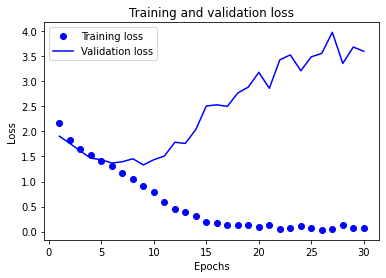

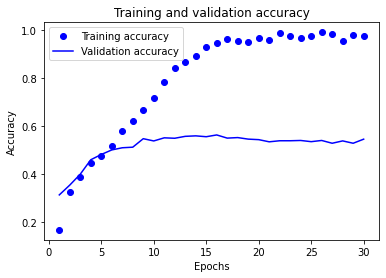

In [10]:
batch_size = 32
epochs = 30
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

print(f"Test accuracy: {acc_no_aug:.3f}")



plot_model_validation(history_no_aug)

## Run No-Augmentation Model with full dataset ## 
14 Epochs is seems to be a good balance between fitting and over fitting - Using 5000 Samples. 22 Epochs was a good value when testing with 1000 Samples.

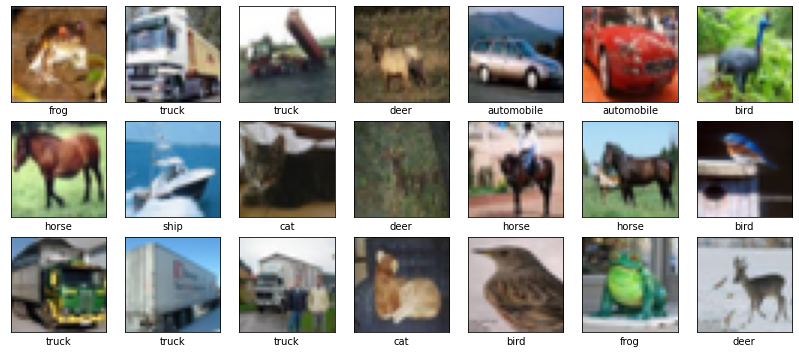

In [11]:
#//*** Reload full data set
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

#//*** Load the CIFAR10 dataset into the default test train splits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


#//*** Verify the subsets are the proper shape
assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000, 1)

#//*** Verify the subsets are the proper shape
assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

#//*** Not sure why x_train is divided by 255 or why Y_train is converted to explicit cetgoricals. 
x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

#//*** Display Sample of Data
visualize_data(x_train, y_train, class_names)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

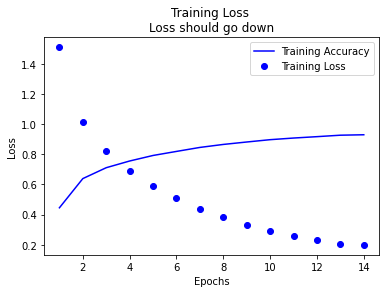

In [12]:
#//*** 14 Epochs to prevent overfitting
batch_size = 32
epochs = 14
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

print(f"Model accuracy: {acc_no_aug:.3f}")


plot_model_history(history_no_aug)

# Assignment 6.2.b #

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation.

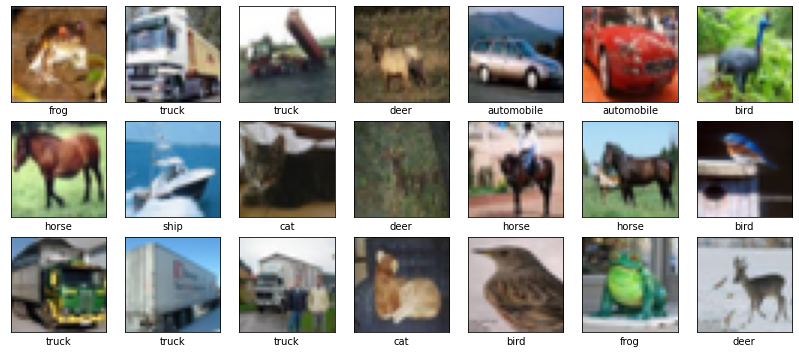

Transformed images


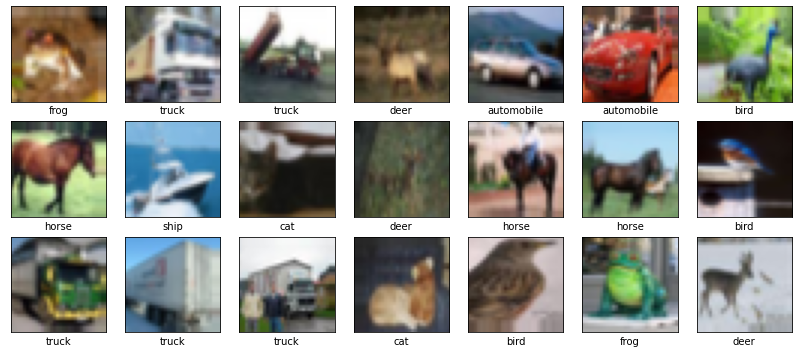

In [19]:
import scipy
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

#//*** Load the CIFAR10 dataset into the default test train splits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
print("Transformed images")
visualize_data(batch_images, batch_labels, class_names)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 128)        

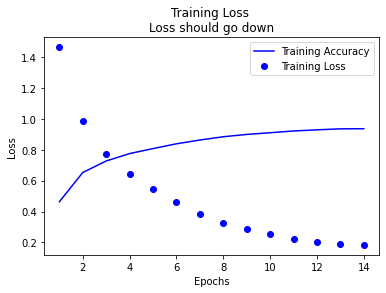

In [21]:
batch_size = 32
epochs = 14
model = create_model()
model.summary()

history = model.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    #validation_data=(x_test, y_test)
)

loss, acc = model.evaluate(batch_images,  batch_labels)

print(f"Model accuracy: {acc:.3f}")


plot_model_history(history)

In [14]:
#//*** The images are 32 x 32 full color images. The input shape will be 32, 32, 3. 
#//*** The first two inputs (32,32) reflect the pixel dimensions. The final tuple value (3) represents the image channels. 3 channels likely represents full color RGB. As in there are three sets of 32x32 
#//*** data. Each reflecting a particular set of color (RGB) data.
inputs = keras.Input(shape=(32, 32, 3))
#//*** No need to rescale since all images have the same size. 
#x = layers.Rescaling(1./255)(inputs)


x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.Flatten()(x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0     

Train on 5000 samples, validate on 5000 samples
Epoch 1/30
5000/5000 [==============================] - 2s 374us/sample - loss: 4.1029 - acc: 0.2058 - val_loss: 2.2490 - val_acc: 0.1926
Epoch 2/30
5000/5000 [==============================] - 2s 302us/sample - loss: 2.0367 - acc: 0.3124 - val_loss: 2.4598 - val_acc: 0.2240
Epoch 3/30
5000/5000 [==============================] - 2s 304us/sample - loss: 1.7131 - acc: 0.4100 - val_loss: 1.8382 - val_acc: 0.3636
Epoch 4/30
5000/5000 [==============================] - 2s 303us/sample - loss: 1.4460 - acc: 0.4956 - val_loss: 1.7399 - val_acc: 0.3916
Epoch 5/30
5000/5000 [==============================] - 2s 303us/sample - loss: 1.2160 - acc: 0.5736 - val_loss: 1.8059 - val_acc: 0.3946
Epoch 6/30
5000/5000 [==============================] - 2s 301us/sample - loss: 1.0115 - acc: 0.6458 - val_loss: 2.1612 - val_acc: 0.3612
Epoch 7/30
5000/5000 [==============================] - 2s 302us/sample - loss: 0.7975 - acc: 0.7296 - val_loss: 2.0487 - va

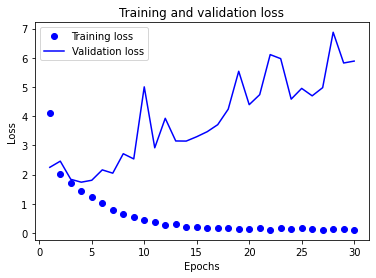

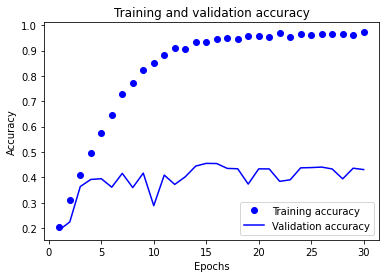

In [9]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=39, batch_size=64)


history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_validation, y_validation))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")



plot_model_validation(history)